In [1]:
import os

import numpy as np

import itk
itk.force_load()

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_onsd_ar_inference import ARGUS_onsd_ar_inference

In [2]:
onsd_ar = ARGUS_onsd_ar_inference(config_file_name="../ARGUS/ARGUS_onsd_ar.cfg", network_name="final", device_num=0)

In [3]:
onsd_ar_best_models = [[0,0]]
onsd_ar.num_models = len(onsd_ar_best_models)

for i,r in enumerate(onsd_ar_best_models):
    model_name = os.path.join("Results", "onsd_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    onsd_ar.load_model(i, model_name)

In [4]:
time_this = ARGUS_time_this

In [5]:
with time_this("Load Video"):
    vid = ARGUS_load_video("Data_ONSD/original/Positives/40/8. 40.1 Left Long_Video 1.mp4")

Time for Load Video is 101.04546490497887


In [6]:
with time_this("Preprocess"):
    onsd_ar.volume_preprocess(vid)

Time for Preprocess is 4.458205162547529


In [7]:
img = onsd_ar.input_image

arr = itk.GetArrayFromImage(img)

for c in range(10):
    with time_this("np gradient"):
        grad_np = np.gradient(arr)
    with time_this("itk gradient"):
        grad_itk = [] #np.empty([3,img.shape[0],img.shape[1],img.shape[2]])
        gradimg = itk.GradientImageFilter(img, UseImageSpacing=False)
        gradarray = itk.GetArrayViewFromImage(gradimg)
        #grad_itk[0] = gradarray[:,:,:,2]
        #grad_itk[1] = gradarray[:,:,:,0]
        #grad_itk[2] = gradarray[:,:,:,1]
        grad_itk.append(gradarray[:,:,:,2])
        grad_itk.append(gradarray[:,:,:,0])
        grad_itk.append(gradarray[:,:,:,1])


Time for np gradient is 0.3499627485871315
Time for itk gradient is 0.2192587200552225
Time for np gradient is 0.34991443902254105
Time for itk gradient is 0.1925191404297948
Time for np gradient is 0.35424264799803495
Time for itk gradient is 0.1885314043611288
Time for np gradient is 0.3619207860901952
Time for itk gradient is 0.19180427305400372
Time for np gradient is 0.3384415917098522
Time for itk gradient is 0.21146557852625847
Time for np gradient is 0.3572738887742162
Time for itk gradient is 0.2236491348594427
Time for np gradient is 0.36968463845551014
Time for itk gradient is 0.20371857658028603
Time for np gradient is 0.3646358698606491
Time for itk gradient is 0.227982965297997
Time for np gradient is 0.35902838222682476
Time for itk gradient is 0.21760349068790674
Time for np gradient is 0.3838048577308655
Time for itk gradient is 0.20851786341518164


In [8]:
print(len(grad_np), grad_np[0].shape)
print(len(grad_itk), grad_itk[0].shape)

3 (457, 320, 320)
3 (457, 320, 320)


-0.40508333 0.348359
-0.32098773 0.317424


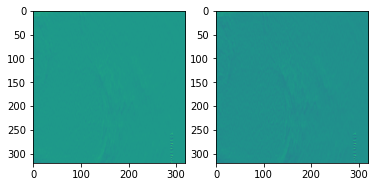

In [9]:
import matplotlib.pyplot as plt

d = 1
plt.subplot(1,2,1)
plt.imshow(grad_np[d][0])
print(grad_np[d][0].min(), grad_np[d][0].max())
plt.subplot(1,2,2)
plt.imshow(grad_itk[d][0])
print(grad_itk[d][0].min(), grad_itk[d][0].max())


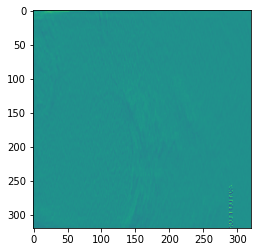

In [43]:
plt.imshow(grad_itk[0][0])

In [7]:
with time_this("Inference"):
    onsd_ar.volume_inference()

itkSize3 ([320, 320, 457])
(457, 320, 320)
[3, 457, 320, 320]
Time for Inference is 84.58124385681003
